<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithhour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')

In [3]:
rain_data09 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/09.csv',encoding='utf-8')
rain_data10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/10.csv',encoding='utf-8')
rain_data11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/11.csv',encoding='utf-8')
rain_data12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/12.csv',encoding='utf-8')
rain_data13 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/13.csv',encoding='utf-8')
rain_data14 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/14.csv',encoding='utf-8')
rain_data15 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/15.csv',encoding='utf-8')
rain_data16 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/16.csv',encoding='utf-8')
rain_data17 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/17.csv',encoding='utf-8')
rain_data18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/18.csv',encoding='utf-8')
rain_data19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/19.csv',encoding='utf-8')
rain_data20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/20.csv',encoding='utf-8')
rain_data21 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/21.csv',encoding='utf-8')
rain_data22 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/22.csv',encoding='utf-8')
rain_data23 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/23.csv',encoding='utf-8')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/data.csv',encoding='utf-8')

In [4]:
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, how='outer'),[rain_data09, rain_data10, rain_data11, rain_data12, rain_data13,rain_data14, rain_data15, rain_data16, rain_data17, rain_data18,rain_data19, rain_data20, rain_data21, rain_data22, rain_data23])

print(rain_data)
print(data)

date = []

for rain_date in rain_data['date']:
  if rain_date not in date:
    date.append(rain_date)

print(date)

             date  hour  code name  rain
0      2009-01-16  3:00   101   춘천   0.1
1      2009-01-16  6:00   100  대관령   0.0
2      2009-01-16  6:00   101   춘천   0.2
3      2009-01-16  6:00   212   홍천   0.0
4      2009-01-16  9:00   100  대관령   0.0
...           ...   ...   ...  ...   ...
63488  2023-12-31  0:00    90   속초   0.0
63489  2023-12-31  0:00   100  대관령   0.0
63490  2023-12-31  0:00   101   춘천   2.3
63491  2023-12-31  0:00   211   인제   1.7
63492  2023-12-31  0:00   212   홍천   0.3

[63493 rows x 5 columns]
Empty DataFrame
Columns: [date, 0:00, 1:00, 2:00, 3:00, 4:00, 5:00, 6:00, 7:00, 8:00, 9:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00, dam_flow]
Index: []

[0 rows x 26 columns]
['2009-01-16', '2009-01-18', '2009-01-19', '2009-01-22', '2009-01-23', '2009-01-24', '2009-01-25', '2009-01-26', '2009-01-30', '2009-01-31', '2009-02-01', '2009-02-03', '2009-02-05', '2009-02-10', '2009-02-11', '2009-02-12', '2009-02-13', '2009-02-1

In [5]:
data['date'] = date

data = data.fillna(0)
# data.set_index("date")
data.index = data['date']
print(data)

                  date  0:00  1:00  2:00  3:00  4:00  5:00  6:00  7:00  8:00  \
date                                                                           
2009-01-16  2009-01-16     0     0     0     0     0     0     0     0     0   
2009-01-18  2009-01-18     0     0     0     0     0     0     0     0     0   
2009-01-19  2009-01-19     0     0     0     0     0     0     0     0     0   
2009-01-22  2009-01-22     0     0     0     0     0     0     0     0     0   
2009-01-23  2009-01-23     0     0     0     0     0     0     0     0     0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-20  2023-12-20     0     0     0     0     0     0     0     0     0   
2023-12-24  2023-12-24     0     0     0     0     0     0     0     0     0   
2023-12-25  2023-12-25     0     0     0     0     0     0     0     0     0   
2023-12-30  2023-12-30     0     0     0     0     0     0     0     0     0   
2023-12-31  2023-12-31     0     0     0

In [6]:
for l in range(len(rain_data)):
  date_value = rain_data['date'][l]
  hour_value = rain_data['hour'][l]
  code_value = rain_data['code'][l]
  rain_value = rain_data['rain'][l]
  # print(date_value, hour_value, code_value, rain_value)
  rain = data.loc[date_value][hour_value]
  if code_value == 100:
    rain_value = rain_value * 0.114
  elif code_value == 101 :
    rain_value = rain_value * 0.128
  elif code_value == 90:
    rain_value = rain_value * 0.094
  elif code_value == 211:
    rain_value = rain_value * 0.668
  rain = rain + rain_value
  data.loc[date_value, hour_value] = rain

print(data)

                  date    0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  \
date                                                                           
2009-01-16  2009-01-16  0.0000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   
2009-01-18  2009-01-18  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-19  2009-01-19  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-22  2009-01-22  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-23  2009-01-23  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
...                ...     ...   ...   ...     ...   ...   ...     ...   ...   
2023-12-20  2023-12-20  0.0668   0.0   0.0  0.2800   0.0   0.0  0.0000   0.0   
2023-12-24  2023-12-24  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2023-12-25  2023-12-25  0.0000   0.0   0.0  0.1128   0.0   0.0  0.1128   0.0   
2023-12-30  2023-12-30  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2023-12-31  2023-12-31  1.7300   0.0   0

In [7]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/dam_flow.csv',encoding='utf-8')
dam_flow.set_index("date", inplace = True)
print(dam_flow)

            dam flow(㎥/s)
date                     
2009-01-01          0.000
2009-01-02          0.825
2009-01-03          3.904
2009-01-04          0.000
2009-01-05          0.000
...                   ...
2023-12-27         25.873
2023-12-28         21.186
2023-12-29         20.887
2023-12-30         29.183
2023-12-31         25.803

[5478 rows x 1 columns]


In [8]:
from functools import reduce

date_index = data.index
dam_value = dam_flow.loc[date_index]
print(dam_value)

data.rename(columns = {'date':'Date'}, inplace=True)
data = reduce(lambda x,y : pd.merge(x,y, on='date', how='outer'), [data, dam_value])

            dam flow(㎥/s)
date                     
2009-01-16          0.000
2009-01-18          0.000
2009-01-19          2.688
2009-01-22          0.957
2009-01-23          0.797
...                   ...
2023-12-20         42.639
2023-12-24         24.665
2023-12-25         25.785
2023-12-30         29.183
2023-12-31         25.803

[2977 rows x 1 columns]


In [9]:
data = data.drop(['dam_flow'], axis=1)
print(data)

                  Date    0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  \
date                                                                           
2009-01-16  2009-01-16  0.0000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   
2009-01-18  2009-01-18  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-19  2009-01-19  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-22  2009-01-22  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-23  2009-01-23  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
...                ...     ...   ...   ...     ...   ...   ...     ...   ...   
2023-12-20  2023-12-20  0.0668   0.0   0.0  0.2800   0.0   0.0  0.0000   0.0   
2023-12-24  2023-12-24  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2023-12-25  2023-12-25  0.0000   0.0   0.0  0.1128   0.0   0.0  0.1128   0.0   
2023-12-30  2023-12-30  0.0000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2023-12-31  2023-12-31  1.7300   0.0   0

<Axes: xlabel='date'>

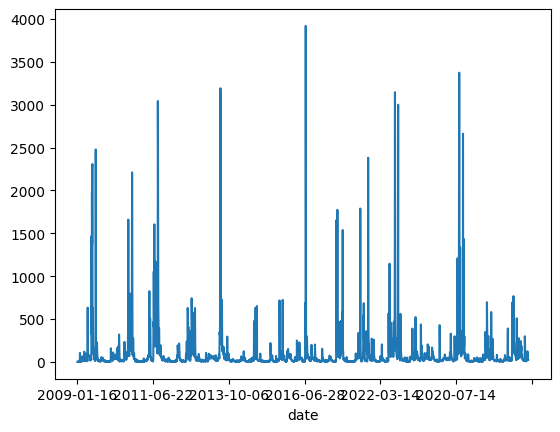

In [10]:
damflow = data['dam flow(㎥/s)']

damflow.plot()

In [11]:
print(max(data['dam flow(㎥/s)']))

3918.5


In [13]:
data['Y'] = data['dam flow(㎥/s)']
data = data.dropna()

train = data[data['Date']<'2018-01-01']
valid = data[data['Date']>='2018-01-01']
valid = valid[valid['Date']<'2022-01-01']
test = data[data['Date']>='2022-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['Date', 'Y'], axis = 1), train['Y']
trainX = trainX.to_numpy()
trainY = trainY.to_numpy()
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1],1)

validX, validY = valid.drop(['Date', 'Y'], axis = 1), valid['Y']
validX = validX.to_numpy()
validY = validY.to_numpy()
validX = validX.reshape(validX.shape[0], validX.shape[1],1)

testX, testY = test.drop(['Date','Y'], axis = 1), test['Y']
testX = testX.to_numpy()
testY = testY.to_numpy()
testX = testX.reshape(testX.shape[0], testX.shape[1],1)


train set :  1814 
 valid set :  773 
 test set :  390 



In [14]:
print(trainX.shape, trainY.shape)

print(trainX)

(1814, 25, 1) (1814,)
[[[ 0.   ]
  [ 0.   ]
  [ 0.   ]
  ...
  [ 0.   ]
  [ 0.   ]
  [ 0.   ]]

 [[ 0.   ]
  [ 0.   ]
  [ 0.   ]
  ...
  [ 0.   ]
  [ 0.   ]
  [ 0.   ]]

 [[ 0.   ]
  [ 0.   ]
  [ 0.   ]
  ...
  [ 0.   ]
  [ 0.   ]
  [ 2.688]]

 ...

 [[ 0.   ]
  [ 0.   ]
  [ 0.   ]
  ...
  [ 0.   ]
  [ 0.   ]
  [11.366]]

 [[ 0.   ]
  [ 0.   ]
  [ 0.   ]
  ...
  [ 0.   ]
  [ 0.   ]
  [ 6.   ]]

 [[ 0.891]
  [ 0.   ]
  [ 0.   ]
  ...
  [ 0.   ]
  [ 0.   ]
  [ 0.285]]]


In [15]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

modelnew = Sequential()

modelnew.add(LSTM(64, input_shape = (25,1)))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(8, 'relu'))
modelnew.add(Dense(8))
modelnew.add(Dense(1))

modelnew.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 40)                2600      
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 8)                 328       
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 21545 (

In [19]:
cp1 = ModelCheckpoint('modelnew/', save_best_only=True)
modelnew.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
modelnew.fit(trainX, trainY, validation_data = (validX, validY), batch_size = 10, epochs=50, callbacks=[cp1])

Epoch 1/50
182/182 [==============================] - 12s 37ms/step - loss: 667.3138 - root_mean_squared_error: 25.8324 - val_loss: 508.9352 - val_root_mean_squared_error: 22.5596
Epoch 2/50
182/182 [==============================] - 7s 39ms/step - loss: 768.5983 - root_mean_squared_error: 27.7236 - val_loss: 197.3438 - val_root_mean_squared_error: 14.0479
Epoch 3/50
182/182 [==============================] - 6s 32ms/step - loss: 372.8905 - root_mean_squared_error: 19.3104 - val_loss: 164.1202 - val_root_mean_squared_error: 12.8109
Epoch 4/50
182/182 [==============================] - 8s 44ms/step - loss: 365.0938 - root_mean_squared_error: 19.1074 - val_loss: 91.7121 - val_root_mean_squared_error: 9.5766
Epoch 5/50
182/182 [==============================] - 2s 12ms/step - loss: 299.9923 - root_mean_squared_error: 17.3203 - val_loss: 263.6285 - val_root_mean_squared_error: 16.2366
Epoch 6/50
182/182 [==============================] - 2s 12ms/step - loss: 330.5029 - root_mean_squared_er

In [20]:
train_score = modelnew.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

13/13 [==============================] - 0s 5ms/step - loss: 183.8482 - root_mean_squared_error: 13.5591
Train Score: 183.85 MSE (13.56 RMSE)


In [21]:
# from tensorflow.keras.models import load_model
# model = load_model('model/')

train_predictions = modelnew.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

57/57 [==============================] - 1s 5ms/step


,Train Predictions,Actuals
0,0.209329,0.000
1,0.209361,0.000
2,3.128323,2.688
3,1.264244,0.957
4,1.089069,0.797
...,...,...
1809,0.209229,0.000
1810,6.067146,5.522
1811,12.117838,11.366
1812,6.575603,6.000


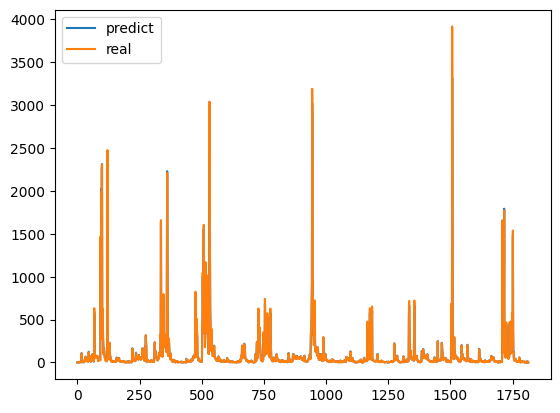

In [22]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:])
plt.plot(train_results['Actuals'][:])

plt.legend(['predict','real'])

In [23]:
val_predictions = modelnew.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

25/25 [==============================] - 0s 5ms/step


,Val Predictions,Actuals
0,0.209470,0.000
1,3.944055,3.462
2,5.401654,4.869
3,0.209236,0.000
4,0.212603,0.003
...,...,...
768,9.704820,8.996
769,9.945095,9.231
770,4.510748,4.005
771,10.061316,9.345


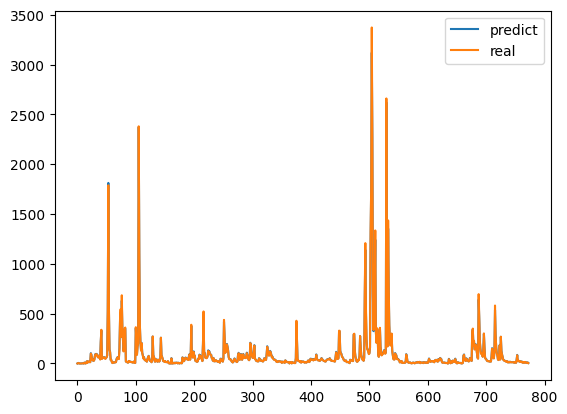

In [24]:
plt.plot(val_results['Val Predictions'][:])
plt.plot(val_results['Actuals'][:])

plt.legend(['predict','real'])

In [25]:
test_predictions = modelnew.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

13/13 [==============================] - 0s 13ms/step


,Test Predictions,Actuals
0,2.672563,2.260
1,2.786781,2.367
2,14.801547,14.116
3,9.361137,8.661
4,3.419445,2.963
...,...,...
385,45.936321,42.639
386,24.954388,24.665
387,26.071041,25.785
388,29.727816,29.183


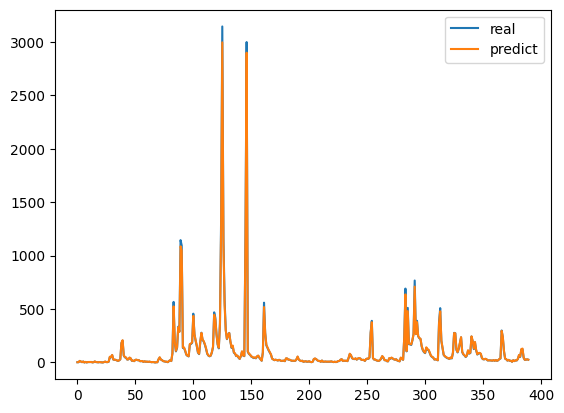

In [26]:
plt.plot(test_results['Actuals'][:])
plt.plot(test_results['Test Predictions'][:])

plt.legend(['real', 'predict'])